In [1]:
import math

import numpy as np
from scipy import stats
import matplotlib as mpl
from matplotlib import pyplot as plt

from datasets import load_GPCA_and_MAPPIT_data
from plotting import (validation_plot,
                      validation_titration_plot,
                      COLOR_RRS, 
                      COLOR_PRS,
                      COLOR_LIT,
                      COLOR_Y2H,
                      COLOR_GI_PSN,
                      COLOR_CYC2008)

In [2]:
# the ipython matplotlib inline display overrides the rcParams
# that used to be called on the pyplot import but now seems like
# it's called on the first use of inline figures or something 
# problem is in ipython: https://github.com/ipython/ipython/issues/10383
# should be fixed soon: https://github.com/ipython/matplotlib-inline/pull/14
plt.show()
mpl.rcParams['font.size'] = 7.
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['savefig.dpi'] = 500

In [3]:
val = load_GPCA_and_MAPPIT_data(remove_homodimers=True)

In [4]:
def make_titration_plot(experiment_id, sources, name, xlims, colors, labels, line_styles=None):
    sources = [{x} if isinstance(x, str) else x for x in sources]
    assay = val.loc[val['experiment_ID'] == experiment_id, 'assay'].values[0]
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(1.9, 1.5)
    validation_titration_plot(val.loc[val['experiment_ID'] == experiment_id, :],
                              selections=[val['source_dataset'].isin(x) for x in sources],
                              threshold=val.loc[(val['experiment_ID'] == experiment_id) &
                                                (val['source_dataset'] == 'scRRS-v2'),
                                                'score'].max(),
                              score_column='score',
                              colors=colors,
                              labels=labels,
                              line_styles=line_styles,
                              xmin=xlims[0],
                              xmax=xlims[1],
                              ymax=0.5,
                              threshold_label='0 RRS',
                              plot_kwargs={'linewidth': 0.5})
    ax.set_yticks(np.linspace(0, 0.5, 6))
    ax.set_yticks(np.linspace(0, 0.5, 11), minor=True)
    ax.set_xticks(range(math.ceil(xlims[0]), xlims[1] + 1))
    ax.set_xticks(np.arange(xlims[0], xlims[1] + 0.00001, 0.5), minor=True)

    ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_facecolor('white')
    ax.set_title(assay)
    plt.savefig('../figures/{}-{}_{}_titration.pdf'.format(assay, experiment_id, name),
                bbox_inches='tight')

In [5]:
val['source_dataset'].value_counts()

YeRI                     3784
scRRS-v2                  947
scPRS-v2                  518
CCSB-YI1                  432
Ito-core                  431
Tarassov                  431
Lit-BM-13                 427
CYC2008                   413
Uetz-screen               411
PrePPI-LR600              200
GI_PSN_PCC_gt_0.2         191
GI_PSN_PCC_gt_0.3         186
GI_PSN_PCC_gt_0.5         183
Lit-BM-17_4+_evidence      63
Lit-BM-17_3_evidence       63
Lit-BM-17_2_evidence       59
Lit-BS-17                  51
Name: source_dataset, dtype: int64

In [6]:
val.loc[(val['assay'] == 'GPCA') & ~val['source_dataset'].isin(['YeRI']), 'pair'].nunique()

2555

In [7]:
val.loc[(val['assay'] == 'MAPPIT') & ~val['source_dataset'].isin(['YeRI']), 'pair'].nunique()

1244

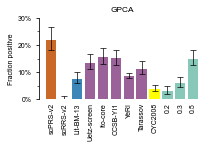

In [8]:
sources = ['scPRS-v2',
           'scRRS-v2',
           'Lit-BM-13',
           'Uetz-screen',
           'Ito-core',
           'CCSB-YI1',
           'YeRI',
           'Tarassov',
           'CYC2008',
           'GI_PSN_PCC_gt_0.2',
           'GI_PSN_PCC_gt_0.3',
           'GI_PSN_PCC_gt_0.5']
colors = [COLOR_PRS,
          COLOR_RRS,
          COLOR_LIT,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_CYC2008,
          COLOR_GI_PSN,
          COLOR_GI_PSN,
          COLOR_GI_PSN,
          ]
labels = ['scPRS-v2',
          'scRRS-v2',
          'Lit-BM-13',
          'Uetz-screen',
          'Ito-core',
          'CCSB-YI1',
          'YeRI',
          'Tarassov',
          'CYC2008',
          '0.2',
          '0.3',
          '0.5']
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=3, h=1.5)
validation_plot(data=val.loc[val['experiment_ID'] == 'Sv01'],
                     selections=[val['source_dataset'] == x for x in sources],
                     result_column='result_at_0_RRS',
                     colors=colors,
                    draw_numbers=False,
                         xlabel_rotation=90,
                         ax=ax,
                         errorbar_capsize=0.5,
                         errorbar_thickness=0.7,
                    labels=labels)
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
ax.set_facecolor('white')
ax.set_ylim(0, 0.3)
ax.set_title('GPCA')
plt.savefig('../figures/GPCA_all_datesets_bar.pdf',
            bbox_inches='tight')

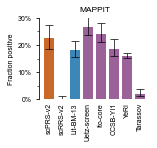

In [9]:
sources = ['scPRS-v2',
           'scRRS-v2',
           'Lit-BM-13',
           'Uetz-screen',
           'Ito-core',
           'CCSB-YI1',
           'YeRI',
           'Tarassov']
colors = [COLOR_PRS,
          COLOR_RRS,
          COLOR_LIT,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H]
labels = ['scPRS-v2',
          'scRRS-v2',
          'Lit-BM-13',
          'Uetz-screen',
          'Ito-core',
          'CCSB-YI1',
          'YeRI',
          'Tarassov']
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(2, 1.5)
validation_plot(data=val.loc[val['experiment_ID'] == 'Sv03'],
                     selections=[val['source_dataset'] == x for x in sources],
                     result_column='result_at_0_RRS',
                     colors=colors,
                    draw_numbers=False,
                         xlabel_rotation=90,
                         ax=ax,
                         errorbar_capsize=0.75,
                         errorbar_thickness=0.7,
                    labels=labels)
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
ax.set_facecolor('white')
ax.set_ylim(0, 0.30)
ax.set_title('MAPPIT')
plt.savefig('../figures/MAPPIT_all_binary_datesets_bar.pdf',
            bbox_inches='tight')

In [10]:
# p-value for Tarassov above RRS
experiment = 'Sv03'
result_tarassov = val.loc[(val['experiment_ID'] == experiment) &
                          (val['source_dataset'] == 'Tarassov'),
                          'result_at_0_RRS']
result_rrs = val.loc[(val['experiment_ID'] == experiment) &
                     (val['source_dataset'] == 'scRRS-v2'),
                     'result_at_0_RRS']
stats.fisher_exact([[(result_rrs == True).sum(),
                     (result_rrs == False).sum()],
                    [(result_tarassov == True).sum(),
                     (result_tarassov == False).sum()]],
                    alternative='less')

SignificanceResult(statistic=0.0, pvalue=0.11674419346859967)

In [11]:
# p-value for Lit-BS above RRS
experiment = 'Sv06'
result_litbs = val.loc[(val['experiment_ID'] == experiment) &
                          (val['source_dataset'] == 'Lit-BS-17'),
                          'result_at_0_RRS']
result_rrs = val.loc[(val['experiment_ID'] == experiment) &
                     (val['source_dataset'] == 'scRRS-v2'),
                     'result_at_0_RRS']
stats.fisher_exact([[(result_rrs == True).sum(),
                     (result_rrs == False).sum()],
                    [(result_litbs == True).sum(),
                     (result_litbs == False).sum()]],
                    alternative='less')

SignificanceResult(statistic=0.0, pvalue=0.06496767309020149)

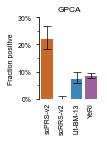

In [12]:
def YI2_validation_bar_plot(experiment_ID, include_literature=True):
    assays = val.loc[val['experiment_ID'] == experiment_ID, 'assay'].unique()
    if len(assays) > 1:
        raise UserWarning('Something wrong with validation data. Different assays for same experiment.')
    assay = assays[0]
    if include_literature:
        sources = ['scPRS-v2',
                   'scRRS-v2',
                   'Lit-BM-13',
                   'YeRI']
        colors = [COLOR_PRS,
                  COLOR_RRS,
                  COLOR_LIT,
                  COLOR_Y2H]
        labels = ['scPRS-v2',
                  'scRRS-v2',
                  'Lit-BM-13',
                  'YeRI']
    else:
        sources = ['scPRS-v2',
                   'scRRS-v2',
                   'YeRI']
        colors = [COLOR_PRS,
                  COLOR_RRS,
                  COLOR_Y2H]
        labels = ['scPRS-v2',
                  'scRRS-v2',
                  'YeRI']
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(1.1 if include_literature else 0.8, 1.5)
    validation_plot(data=val.loc[val['experiment_ID'] == experiment_ID],
                         selections=[val['source_dataset'] == x for x in sources],
                         result_column='result_at_0_RRS',
                         colors=colors,
                        draw_numbers=False,
                             xlabel_rotation=90,
                             ax=ax,
                             errorbar_capsize=0.75,
                             errorbar_thickness=0.7,
                        labels=labels)
    ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(length=0)
    ax.set_facecolor('white')
    ax.set_ylim(0, 0.30)
    ax.set_title(assay)
    plt.savefig('../figures/{}_{}_YeRI_bar.pdf'.format(assay, experiment_ID),
                bbox_inches='tight')

    
YI2_validation_bar_plot('Sv01')

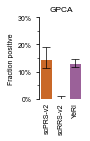

In [13]:
YI2_validation_bar_plot('Sv02', include_literature=False)

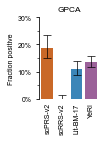

In [14]:
experiment_ID = 'Sv06'

assays = val.loc[val['experiment_ID'] == experiment_ID, 'assay'].unique()
if len(assays) > 1:
    raise UserWarning('Something wrong with validation data. Different assays for same experiment.')
assay = assays[0]
sources = [{'scPRS-v2'},
           {'scRRS-v2'},
           {'Lit-BM-17_2_evidence', 'Lit-BM-17_3_evidence', 'Lit-BM-17_4+_evidence'},
           {'YeRI'}]
colors = [COLOR_PRS,
          COLOR_RRS,
          COLOR_LIT,
          COLOR_Y2H]
labels = ['scPRS-v2',
          'scRRS-v2',
          'Lit-BM-17',
          'YeRI']
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(1.1, 1.5)
validation_plot(data=val.loc[val['experiment_ID'] == experiment_ID],
                     selections=[val['source_dataset'].isin(x) for x in sources],
                     result_column='result_at_0_RRS',
                     colors=colors,
                    draw_numbers=False,
                         xlabel_rotation=90,
                         ax=ax,
                         errorbar_capsize=0.75,
                         errorbar_thickness=0.7,
                    labels=labels)
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
ax.set_facecolor('white')
ax.set_ylim(0, 0.30)
ax.set_title(assay)
plt.savefig('../figures/{}_{}_YeRI_bar.pdf'.format(assay, experiment_ID),
                bbox_inches='tight')

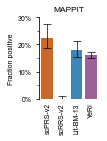

In [15]:
YI2_validation_bar_plot('Sv03')

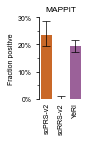

In [16]:
YI2_validation_bar_plot('Sv04', include_literature=False)

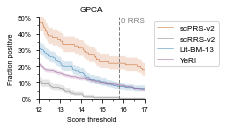

In [17]:
make_titration_plot(experiment_id='Sv01',
                    sources=['scPRS-v2',
                             'scRRS-v2',
                             'Lit-BM-13',
                             'YeRI'],
                    name='YeRI',
                    xlims=(12, 17),
                    colors=[COLOR_PRS,
                              COLOR_RRS,
                              COLOR_LIT,
                              COLOR_Y2H],
                    labels=['scPRS-v2',
                              'scRRS-v2',
                              'Lit-BM-13',
                              'YeRI'])

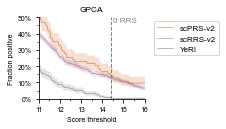

In [18]:
make_titration_plot(experiment_id='Sv02',
                    sources=['scPRS-v2',
                             'scRRS-v2',
                             'YeRI'],
                    name='YeRI',
                    xlims=(11, 16),
                    colors=[COLOR_PRS,
                              COLOR_RRS,
                              COLOR_Y2H],
                    labels=['scPRS-v2',
                              'scRRS-v2',
                              'YeRI'])

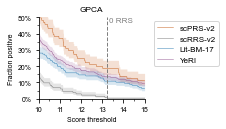

In [19]:
make_titration_plot(experiment_id='Sv06',
                    sources=['scPRS-v2',
                             'scRRS-v2',
                             {'Lit-BM-17_2_evidence', 'Lit-BM-17_3_evidence', 'Lit-BM-17_4+_evidence'},
                             'YeRI'],
                    name='YeRI',
                    xlims=(10, 15),
                    colors=[COLOR_PRS,
                              COLOR_RRS,
                            COLOR_LIT,
                              COLOR_Y2H],
                    labels=['scPRS-v2',
                              'scRRS-v2',
                            'Lit-BM-17',
                              'YeRI'])

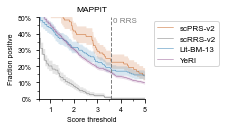

In [20]:
make_titration_plot(experiment_id='Sv03',
                    sources=['scPRS-v2',
                             'scRRS-v2',
                             'Lit-BM-13',
                             'YeRI'],
                    name='YeRI',
                    xlims=(0.5, 5),
                    colors=[COLOR_PRS,
                              COLOR_RRS,
                              COLOR_LIT,
                              COLOR_Y2H],
                    labels=['scPRS-v2',
                              'scRRS-v2',
                              'Lit-BM-13',
                              'YeRI'])

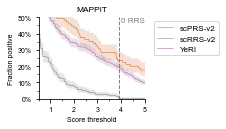

In [21]:
make_titration_plot(experiment_id='Sv04',
                    sources=['scPRS-v2',
                             'scRRS-v2',
                             'YeRI'],
                    name='YeRI',
                    xlims=(0.5, 5),
                    colors=[COLOR_PRS,
                              COLOR_RRS,
                              COLOR_Y2H],
                    labels=['scPRS-v2',
                              'scRRS-v2',
                              'YeRI'])

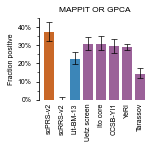

In [22]:
# GPCA or MAPPIT
# MAPPIT or GPCA "assayome"
sources = ['scPRS-v2',
           'scRRS-v2',
           'Lit-BM-13',
           'Uetz-screen',
           'Ito-core',
           'CCSB-YI1',
           'YeRI',
           'Tarassov']

# pairs successfully tested in both
df = val.loc[val['experiment_ID'].isin(['Sv01', 'Sv03']) &
             val['source_dataset'].isin(sources),
             ['pair', 'source_dataset', 'assay', 'result_at_0_RRS']].copy()
df = df.drop_duplicates(['pair', 'source_dataset', 'assay'])
df['pair_and_source'] = df['pair'] + '|' + df['source_dataset']
df = df.pivot(index='pair_and_source', columns='assay', values='result_at_0_RRS')
df['source_dataset'] = df.index.map(lambda x: x.split('|')[0])
df['source_dataset'] = df.index.map(lambda x: x.split('|')[1])

# have to be careful with boolean logic and nulls in pandas here
df['MAPPIT_OR_GPCA'] = df['GPCA'] | df['MAPPIT']
df.loc[(df['GPCA'].isnull() & (df['MAPPIT'] != True)) | 
       (df['MAPPIT'].isnull() & (df['GPCA'] != True)),
        'MAPPIT_OR_GPCA'] = np.nan
df.loc[df['GPCA'].isnull() & (df['MAPPIT'] == True), 'MAPPIT_OR_GPCA'] = True


colors = [COLOR_PRS,
          COLOR_RRS,
          COLOR_LIT,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H,
          COLOR_Y2H]
labels = ['scPRS-v2',
          'scRRS-v2',
          'Lit-BM-13',
          'Uetz screen',
          'Ito core',
          'CCSB-YI1',
          'YeRI',
          'Tarassov']
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(2, 1.5)
validation_plot(data=df,
                     selections=[df['source_dataset'] == x for x in sources],
                     result_column='MAPPIT_OR_GPCA',
                     colors=colors,
                    draw_numbers=False,
                         xlabel_rotation=90,
                         ax=ax,
                         errorbar_capsize=0.5,
                         errorbar_thickness=0.7,
                    labels=labels)
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
ax.set_facecolor('white')
ax.set_ylim(0, 0.45)
ax.set_title('MAPPIT OR GPCA')
plt.savefig('../figures/MAPPIT_OR_GPCA_binary_datesets_bar.pdf',
            bbox_inches='tight')

In [23]:
val_alt = val.copy()
# NOTE: inconsistency in dataset naming -
val_alt.loc[val_alt['source_dataset'].isin({'Uetz screen', 'Ito core', 'Uetz-screen', 'Ito-core', 'CCSB-YI1'}),
            'source_dataset'] = 'Y2H-union'
val_alt = val_alt.drop_duplicates(['pair', 'experiment_ID', 'source_dataset'])

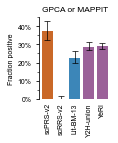

In [24]:
# GPCA or MAPPIT
# MAPPIT or GPCA "assayome"
sources = ['scPRS-v2',
           'scRRS-v2',
           'Lit-BM-13',
           'Y2H-union',
           'YeRI']

# pairs successfully tested in both
df = val_alt.loc[val_alt['experiment_ID'].isin(['Sv01', 'Sv03']) &
             val_alt['source_dataset'].isin(sources),
             ['pair', 'source_dataset', 'assay', 'result_at_0_RRS']].copy()
df = df.drop_duplicates(['pair', 'source_dataset', 'assay'])
df['pair_and_source'] = df['pair'] + '|' + df['source_dataset']
df = df.pivot(index='pair_and_source', columns='assay', values='result_at_0_RRS')
df['source_dataset'] = df.index.map(lambda x: x.split('|')[0])
df['source_dataset'] = df.index.map(lambda x: x.split('|')[1])

# have to be careful with boolean logic and nulls in pandas here
df['MAPPIT_OR_GPCA'] = df['GPCA'] | df['MAPPIT']
df.loc[(df['GPCA'].isnull() & (df['MAPPIT'] != True)) | 
       (df['MAPPIT'].isnull() & (df['GPCA'] != True)),
        'MAPPIT_OR_GPCA'] = np.nan
df.loc[df['GPCA'].isnull() & (df['MAPPIT'] == True), 'MAPPIT_OR_GPCA'] = True


colors = [COLOR_PRS,
          COLOR_RRS,
          COLOR_LIT,
          COLOR_Y2H,
          COLOR_Y2H]
labels = ['scPRS-v2',
          'scRRS-v2',
          'Lit-BM-13',
          'Y2H-union',
          'YeRI']
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=1.3, h=1.5)
validation_plot(data=df,
                     selections=[df['source_dataset'] == x for x in sources],
                     result_column='MAPPIT_OR_GPCA',
                     colors=colors,
                    draw_numbers=False,
                         xlabel_rotation=90,
                         ax=ax,
                         errorbar_capsize=0.5,
                         errorbar_thickness=0.7,
                    labels=labels)
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
ax.set_facecolor('white')
ax.set_ylim(0, 0.45)
ax.set_title('GPCA or MAPPIT')
plt.savefig('../figures/MAPPIT_OR_GPCA_YeRI-and-Y2H-union_bar.pdf',
            bbox_inches='tight')
# Y2H-union for GPCA and MAPPIT plots

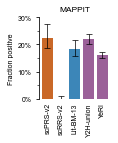

In [25]:
def YI2_validation_bar_plot_with_(experiment_ID):
    assays = val_alt.loc[val_alt['experiment_ID'] == experiment_ID, 'assay'].unique()
    if len(assays) > 1:
        raise UserWarning('Something wrong with validation data. Different assays for same experiment.')
    assay = assays[0]
    sources = ['scPRS-v2',
                'scRRS-v2',
                'Lit-BM-13',
                'Y2H-union',
                'YeRI']
    colors = [COLOR_PRS,
                COLOR_RRS,
                COLOR_LIT,
                COLOR_Y2H,
                COLOR_Y2H]
    labels = ['scPRS-v2',
                'scRRS-v2',
                'Lit-BM-13',
                'Y2H-union',
                'YeRI']
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(1.3, 1.5)
    validation_plot(data=val_alt.loc[val_alt['experiment_ID'] == experiment_ID],
                         selections=[val_alt['source_dataset'] == x for x in sources],
                         result_column='result_at_0_RRS',
                         colors=colors,
                        draw_numbers=False,
                             xlabel_rotation=90,
                             ax=ax,
                             errorbar_capsize=0.5,
                             errorbar_thickness=0.7,
                        labels=labels)
    ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(length=0)
    ax.set_facecolor('white')
    ax.set_ylim(0, 0.30)
    ax.set_title(assay)
    plt.savefig('../figures/{}_{}_YeRI_Y2H-union_bar.pdf'.format(assay, experiment_ID),
                bbox_inches='tight')
    

YI2_validation_bar_plot_with_('Sv03')

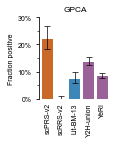

In [26]:
YI2_validation_bar_plot_with_('Sv01')